In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("Churn_Modelling.csv")

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 gives 1st five rows

In [22]:
df.shape

(10000, 14)

shape of data i.e roe and column count

In [23]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

1 is people who churned
0 is people who stayed

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


discribe the all information in format of count, mean, std , min, max, 25%,50 and 75%

In [26]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

return column names

In [27]:
df_numerical=df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]

df_categorical=df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


In [28]:
df_numerical=df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]

df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


# EDA (Exploratory Data Analysis)

We gonna do two types of analysis,

1. Univariate
2. Bivariate

# EDA FOR NUMERICAL FEATURES 

WE ARE DOING EDA FOR NUMERCAL FEATURES.

In [29]:
df_numerical.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited'], dtype='object')

In [30]:
df['Tenure'].value_counts()
#tenure is your categorical feature

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

# CREDIT SCORE

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

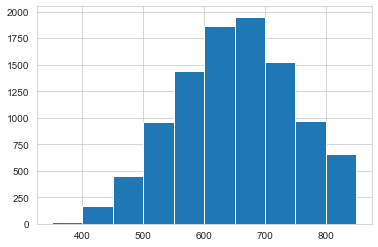

In [31]:
plt.hist(df_numerical['CreditScore'])


Credit score histogram is giving us a hint to normal distributed curve, means most of the people
have credit score betweeen 600 to 700

There are less people which have credit score more than 800 and which have credit score less than
400

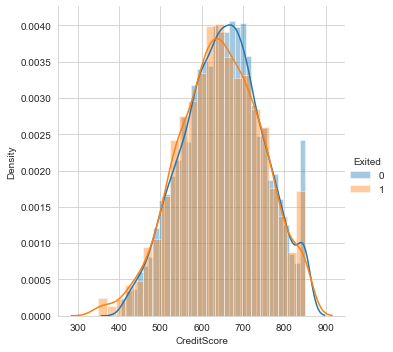

In [32]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "CreditScore")\
   .add_legend();
plt.show();

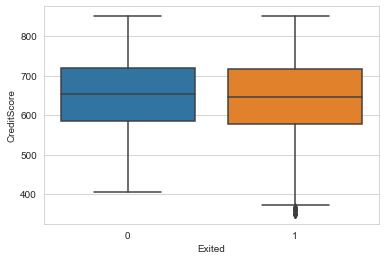

In [33]:
#box plot

sns.boxplot(x='Exited',y='CreditScore', data=df_numerical)
plt.show()

25% of creadit score less then 575,  left people,  
50% of creadit score in between 575 to 650,  
75% of creadit score who left have below 725 score

<function matplotlib.pyplot.show(close=None, block=None)>

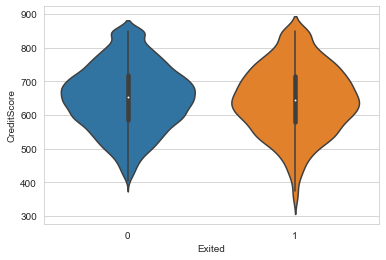

In [34]:
#violin plot
sns.violinplot(x='Exited',y='CreditScore',data=df_numerical)
plt.show

does not added any value

# Age 

we will do eda for AGE

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

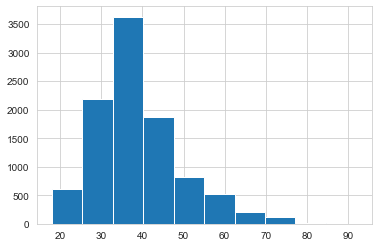

In [35]:
plt.hist(df_numerical['Age'])

in bank there are most of the customer who have age in between 20 to 55,  
and high range of age is 30 to 50

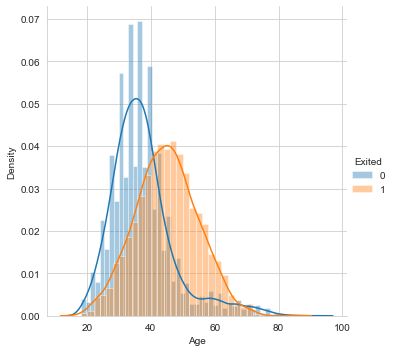

In [36]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "Age")\
   .add_legend();
plt.show();

pdf and cdf gives us information about who left and who stay,


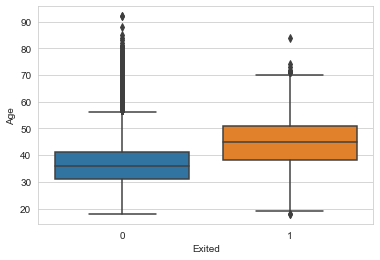

In [37]:
#box plot

sns.boxplot(x='Exited',y='Age', data=df_numerical)
plt.show()

this info added values ,   
people who have age above 40 has more chances to left,   
age in between 30 to 40 has more chances to stay

<function matplotlib.pyplot.show(close=None, block=None)>

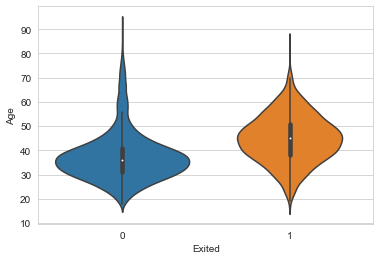

In [38]:
#violin plot
sns.violinplot(x='Exited',y='Age',data=df_numerical)
plt.show

does not added any value

# Balance

we will do eda for Balance

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

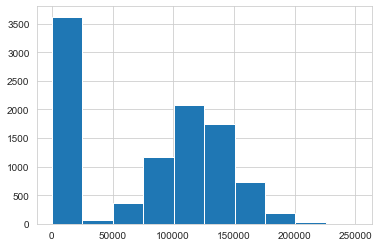

In [39]:
plt.hist(df_numerical['Balance'])

we can say that most of the blance is in between 50000 to 200000 and we can clealy see that 35% pepole have zero balnce

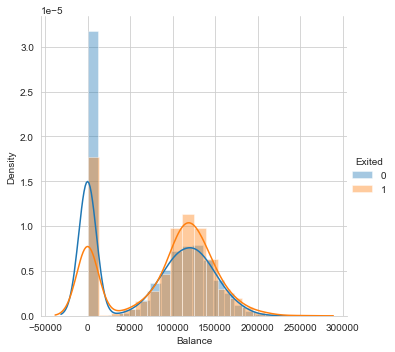

In [40]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "Balance")\
   .add_legend();
plt.show();

we observed that mostly pepole who left they have zero blance
it added values to our anlysis

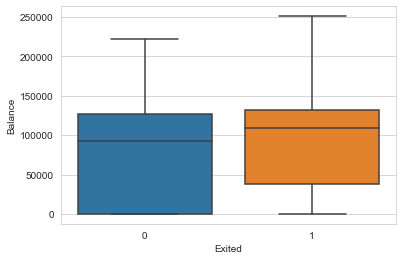

In [41]:
#box plot

sns.boxplot(x='Exited',y='Balance', data=df_numerical)
plt.show()

people who churn has balnce below 50000 ,  
people who have blance in between 50000 to 1500000 are more chances to stays,  
25% of my data lies below 0,  
75% of my data lies below 100000, 

<function matplotlib.pyplot.show(close=None, block=None)>

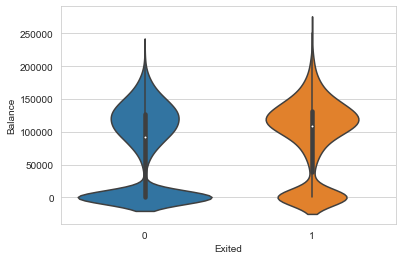

In [42]:
#violin plot
sns.violinplot(x='Exited',y='Balance',data=df_numerical)
plt.show

we cant see clearly

# EstimatedSalary

we will do eda for EstimatedSalary

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

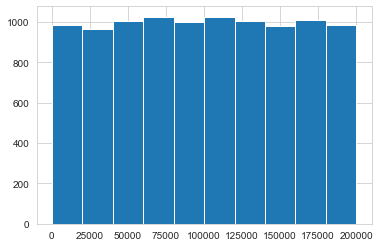

In [43]:
plt.hist(df_numerical['EstimatedSalary'])

oops! it does not added any value

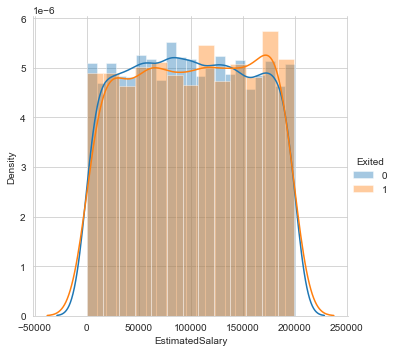

In [44]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "EstimatedSalary")\
   .add_legend();
plt.show();

here also we cant say anything clearly

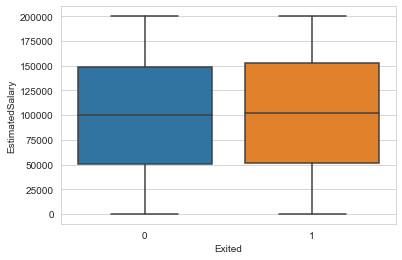

In [45]:
#box plot

sns.boxplot(x='Exited',y='EstimatedSalary', data=df_numerical)
plt.show()

25% of my data have estimated salary less then 50000,  
50% of data have estimated salary in between 50000 to 100000,  
75% of data have estimated salary below 1500000

<function matplotlib.pyplot.show(close=None, block=None)>

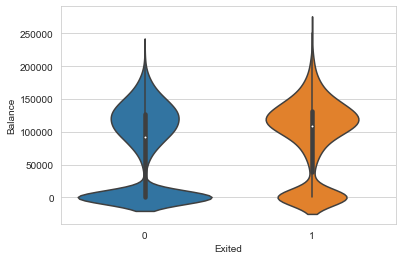

In [46]:
#violin plot
sns.violinplot(x='Exited',y='Balance',data=df_numerical)
plt.show

violin plot is combination of box plot and pdf

# BIVARIATE ANALYSIS

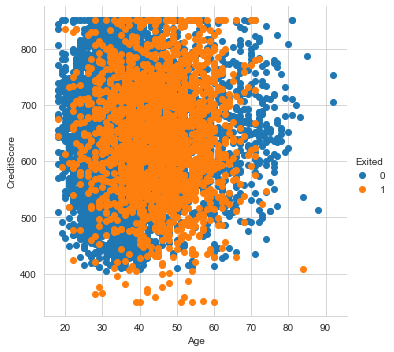

In [47]:
# LETS PLOT CREDIT SCORE AND AGE

import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age","CreditScore")\
   .add_legend();
plt.show();

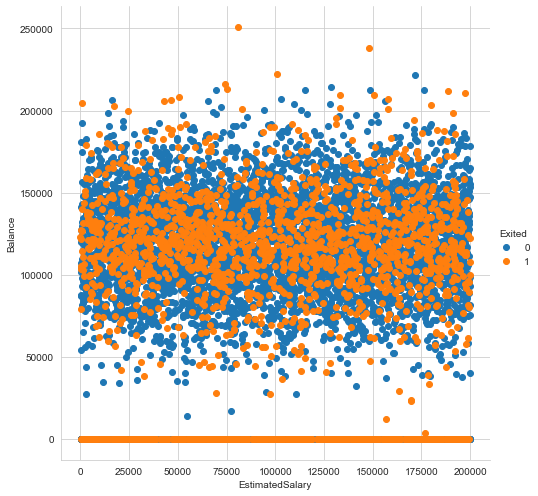

In [48]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=7) \
   .map(plt.scatter, "EstimatedSalary","Balance")\
   .add_legend();
plt.show();

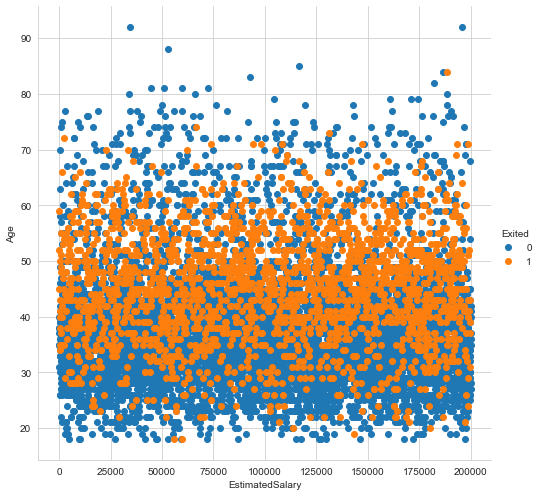

In [49]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=7) \
   .map(plt.scatter, "EstimatedSalary","Age")\
   .add_legend();
plt.show();

we can say that most of the people who left are below age of 25 and above age of 60

# pair plot

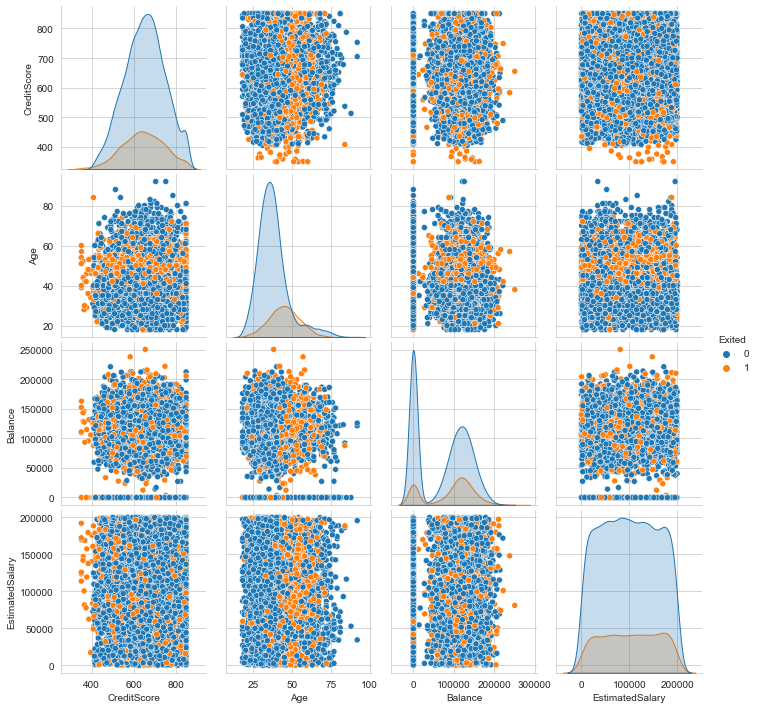

In [50]:
sns.pairplot(df_numerical,hue='Exited')

# scaling of numerical features

Now we gonna do scaling of numerical features..


In [51]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
CS= scaling.fit_transform(df_numerical[['CreditScore']])
age = scaling.fit_transform(df_numerical[['Age']])
Balance= scaling.fit_transform(df_numerical[['Balance']])

ES=scaling.fit_transform(df_numerical[['EstimatedSalary']])

df_numerical['CreditScore'] = CS

df_numerical['Age'] = age

df_numerical['Balance'] =Balance

df_numerical['EstimatedSalary'] =ES



#X['MonthlyCharges'] = mc

In [53]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


# CATEGORICAL FEATURES

LETS SEE UNIVARIATE ANALYSIS 


In [54]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


 # one hot encoding

In [55]:

categorical = ['Geography','Gender']
df_categorical = pd.get_dummies(df_categorical, columns=categorical, drop_first=True)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,2,1,1,1,1,0,0,0
1,1,1,0,1,0,0,1,0
2,8,3,1,0,1,0,0,0
3,1,2,0,0,0,0,0,0
4,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,0,1
9996,10,1,1,1,0,0,0,1
9997,7,1,0,1,1,0,0,0
9998,3,2,1,0,1,1,0,1


# NumberofProducts

In [56]:
import warnings
warnings.filterwarnings("ignore")
a=df_categorical['NumOfProducts'].value_counts()
a

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

people with 1 product count is 5084,  
people with 2 product count is 4590,  
people who have 4 product are very less count i.e 60

<AxesSubplot:>

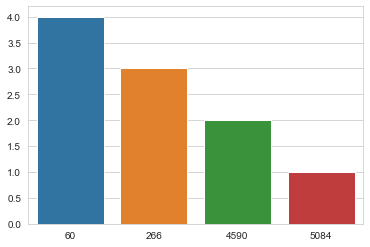

In [57]:
sns.barplot(x=a.values,y=a.index)
#i will check this

(-1.1059349205019084,
 1.1002826158397652,
 -1.116497450906123,
 1.1041122438861788)

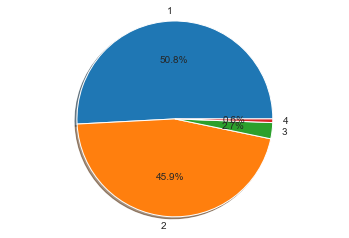

In [58]:
labels = a.index
sizes =a.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

50.8% of total distrubtion have 1 product,  
45.9% of total distrubtion have 2 product,  
2.7% of total distrubtion have 3 products,  
and only 0.6% distrubtion have 4 product

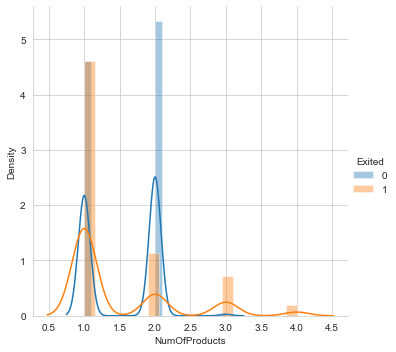

In [59]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "NumOfProducts")\
   .add_legend();
plt.show();

we can say that people who has 2 product are stay,  
people with 3 and 4 product are left mostly,  


# HasCrCard

In [60]:
import warnings
warnings.filterwarnings("ignore")
b=df_categorical['HasCrCard'].value_counts()
b


1    7055
0    2945
Name: HasCrCard, dtype: int64

<b>Here 1 means all the people who does not have credit card

and 0 means all the people who does have credit card</b>

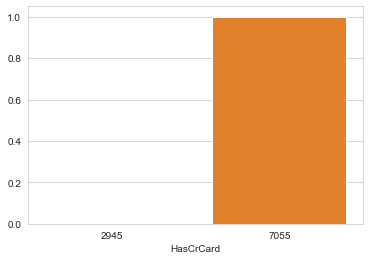

In [61]:
sns.barplot(b,b.index)
plt.show()

we cant observ anything from this chart

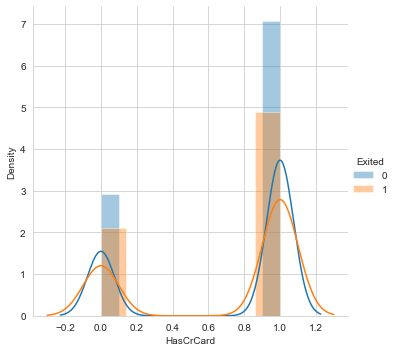

In [62]:

#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "HasCrCard")\
   .add_legend();
plt.show();

people who have credit card are more chance to stay


(-1.1179836976946826,
 1.1008563665568896,
 -1.1127024981118583,
 1.1140147351863388)

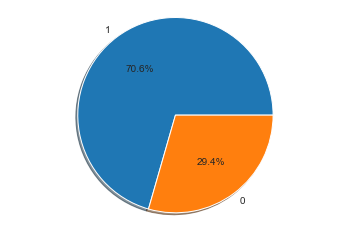

In [63]:
labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

29.4% people have credit card,  
70.6% people who doesn't have credit card

<h1>IsActiveMember</h1>

In [64]:
import warnings
warnings.filterwarnings("ignore")
b=df_categorical['IsActiveMember'].value_counts()
b


1    5151
0    4849
Name: IsActiveMember, dtype: int64

5151 people are active member,  
4849 people are not active    
but not much diffrance in is active members   
doesn't added any value

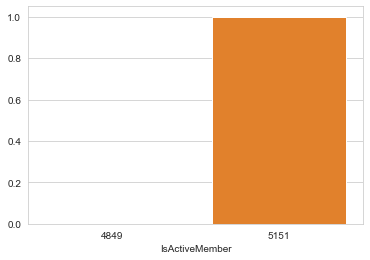

In [65]:
sns.barplot(b,b.index)
plt.show()

5151 are active members

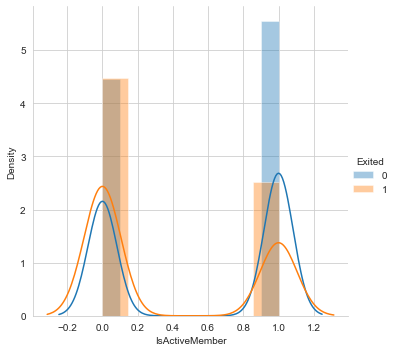

In [69]:
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "IsActiveMember")\
   .add_legend();
plt.show();

(-1.1087372254070178,
 1.1004160583527152,
 -1.1118757228685465,
 1.1061089972124956)

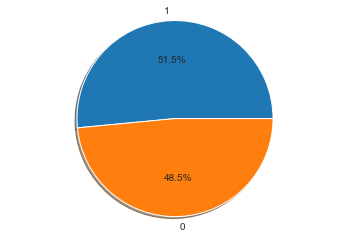

In [67]:
labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

51% people are active

# MEAN,MEDIAN AND PERCENTILE

In [21]:
stayed=df[df['Exited']==0]
#pick those rows which have exited column =0
left=df[df['Exited']==1]
#these are the people who have churned,exited column=1
stayed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [22]:
left

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [25]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(stayed["CreditScore"]))# people who have stayed
print(np.mean(left["CreditScore"]))# people who have left


#median
print("Median")
print(np.median(stayed["CreditScore"]))# people who have stayed
print(np.median(left["CreditScore"]))# people who have left


print("\nStd-dev:");
print(np.std(stayed["CreditScore"]))
print(np.std(left["CreditScore"]))





Means:
651.8531960316463
645.3514972999509
Median
653.0
646.0

Std-dev:
95.64783071535247
100.29687481012597


In [51]:
df_numerical['Balance']

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

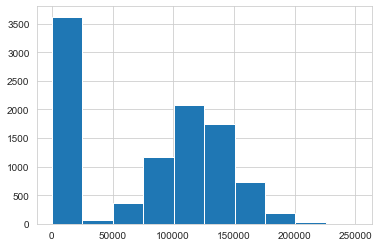

In [52]:
plt.hist(df_numerical['Balance'])

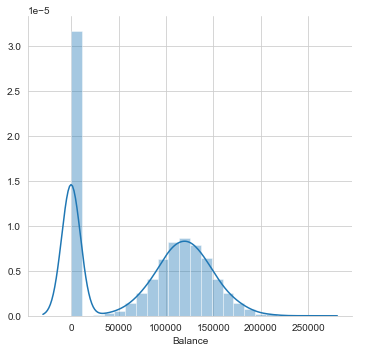

In [54]:
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, size=5) \
   .map(sns.distplot, "Balance")\
   .add_legend();
plt.show();

In [67]:
np.percentile(df_numerical['Balance'],37)

51854.097800000025